In [1]:
%load_ext autoreload
%autoreload 2
#Utilizando autoreload para atualizar as funções dos arquivos importados localmente

# Treinamento dos Classificadores utilizando a base de dados Breast Cancer

In [2]:
from sklearn import datasets
(breast_cancer_data, breast_cancer_target) = datasets.load_breast_cancer(return_X_y=True) #importando a base de dados

### Heterogeneous Pooling

In [3]:
from HeterogeneousPooling import *
heterogeneousPooling = HeterogeneousPooling()
heterogeneousPooling.fit(X = breast_cancer_data, y = breast_cancer_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 0.23 minutos


In [4]:
(heterogeneousPooling_mean, heterogeneousPooling_std, heterogeneousPooling_inf, heterogeneousPooling_sup) = heterogeneousPooling.results()

### Heterogeneous Pooling usando Hill Climbing

In [5]:
from HeterogeneousPooling import *
hc = HeterogeneousPooling('hill climbing')
hc.fit(X = breast_cancer_data, y = breast_cancer_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 6.44 minutos


In [6]:
(hillClimbing_mean, hillClimbing_std, hillClimbing_inf, hillClimbing_sup) = hc.results()

### Heterogeneous Pooling usando Simulated Anneling 

In [7]:
from HeterogeneousPooling import *
sa = HeterogeneousPooling('simulated anneling')
sa.fit(X = breast_cancer_data, y = breast_cancer_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 15.99 minutos


In [8]:
(simulatedAnneling_mean, simulatedAnneling_std, simulatedAnneling_inf, simulatedAnneling_sup) = sa.results()

### Heterogeneous Pooling usando Genetic Algorithm

In [9]:
from HeterogeneousPooling import *
gn = HeterogeneousPooling('genetic')
gn.fit(X = breast_cancer_data, y = breast_cancer_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 40.50 minutos


In [10]:
(genetic_mean, genetic_std, genetic_inf, genetic_sup) = gn.results()

### Tabela com resultados

In [11]:
import pandas as pd

breast_cancer_table = pd.DataFrame(data={'Média':[heterogeneousPooling_mean, hillClimbing_mean, simulatedAnneling_mean, genetic_mean],
                                  'Desvio Padrão':[heterogeneousPooling_std, hillClimbing_std, simulatedAnneling_std, genetic_std],
                                  'Limite Inferior':[heterogeneousPooling_inf, hillClimbing_inf, simulatedAnneling_inf, genetic_inf],
                                  'Limite Superior':[heterogeneousPooling_sup, hillClimbing_sup, simulatedAnneling_sup, genetic_sup]},
                            index=['HeterogeneousPooling', 'HillClimbing', 'SimulatedAnneling', 'Genetic'])
breast_cancer_table

,Média,Desvio Padrão,Limite Inferior,Limite Superior
HeterogeneousPooling,0.953122,0.021452,0.945446,0.960799
HillClimbing,0.941437,0.027274,0.931677,0.951197
SimulatedAnneling,0.952569,0.024018,0.943974,0.961163
Genetic,0.954898,0.022038,0.947012,0.962784


### Boxplot com resultados

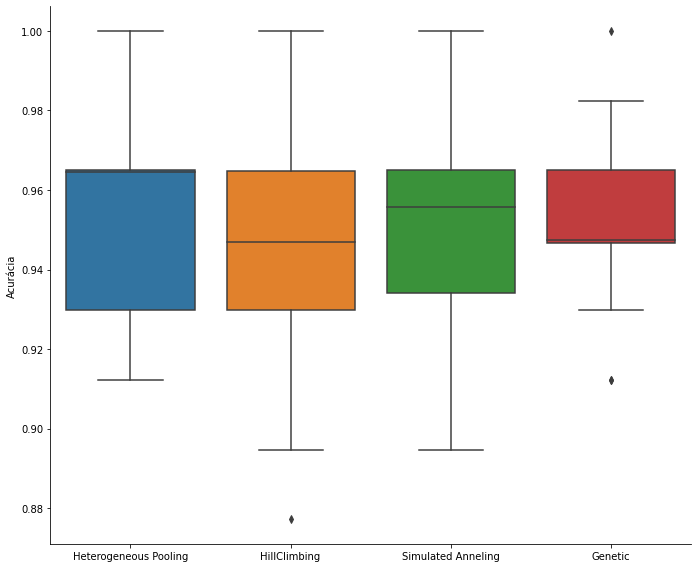

In [12]:
import seaborn as sns
import pandas as pd

scores = pd.DataFrame(data={'Heterogeneous Pooling': heterogeneousPooling.getScores(),
                            'HillClimbing': hc.getScores(),
                            'Simulated Anneling': sa.getScores(),
                            'Genetic': gn.getScores()})
ax = sns.catplot(data=scores, kind="box", height=8, aspect=1.2)
ax.set(ylabel='Acurácia')

### Testes de hipótese

In [13]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

labels = ['Heterogeneous', 'HillClimbing', 'SimulatedAnneling', 'Genetic']
models = [heterogeneousPooling.getScores(), hc.getScores(), sa.getScores(), gn.getScores()]
p_table = pd.DataFrame(index=range(4),columns=range(4))

for i in range(4):
    for j in range(4):
        if i == j:
            p_table.loc[i, j] = labels[i]
        elif j > i:
            _, p = ttest_rel(models[i], models[j])
            p_table.loc[i, j] = p
        else:
            _, p = wilcoxon(models[i], models[j])
            p_table.loc[i, j] = p
            
p_table.style.applymap(lambda v: '' if type(v) == str or v >= 0.05 else 'font-weight: bold').hide_index()

0,1,2,3
Heterogeneous,0.043721,0.895325,0.594607
0.044368,HillClimbing,0.013817,0.015472
0.684593,0.010042,SimulatedAnneling,0.504165
0.919035,0.018351,0.984840,Genetic


# Treinamento dos Classificadores utilizando a base de dados Digits

In [14]:
from sklearn import datasets
(digits_data, digits_target) = datasets.load_digits(return_X_y=True) #importando a base de dados

### Heterogeneous Pooling

In [15]:
from HeterogeneousPooling import *
heterogeneousPooling = HeterogeneousPooling()
heterogeneousPooling.fit(X = digits_data, y = digits_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 0.61 minutos


In [16]:
(heterogeneousPooling_mean, heterogeneousPooling_std, heterogeneousPooling_inf, heterogeneousPooling_sup) = heterogeneousPooling.results()

### Heterogeneous Pooling usando Hill Climbing

In [17]:
from HeterogeneousPooling import *
hc = HeterogeneousPooling('hill climbing')
hc.fit(X = digits_data, y = digits_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 26.49 minutos


In [18]:
(hillClimbing_mean, hillClimbing_std, hillClimbing_inf, hillClimbing_sup) = hc.results()

### Heterogeneous Pooling usando Simulated Anneling 

In [19]:
from HeterogeneousPooling import *
sa = HeterogeneousPooling('simulated anneling')
sa.fit(X = digits_data, y = digits_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 68.20 minutos


In [20]:
(simulatedAnneling_mean, simulatedAnneling_std, simulatedAnneling_inf, simulatedAnneling_sup) = sa.results()

### Heterogeneous Pooling usando Genetic Algorithm

In [21]:
from HeterogeneousPooling import *
gn = HeterogeneousPooling('genetic')
gn.fit(X = digits_data, y = digits_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 174.15 minutos


In [22]:
(genetic_mean, genetic_std, genetic_inf, genetic_sup) = gn.results()

### Tabela com resultados

In [23]:
import pandas as pd

digist_table = pd.DataFrame(data={'Média':[heterogeneousPooling_mean, hillClimbing_mean, simulatedAnneling_mean, genetic_mean],
                                  'Desvio Padrão':[heterogeneousPooling_std, hillClimbing_std, simulatedAnneling_std, genetic_std],
                                  'Limite Inferior':[heterogeneousPooling_inf, hillClimbing_inf, simulatedAnneling_inf, genetic_inf],
                                  'Limite Superior':[heterogeneousPooling_sup, hillClimbing_sup, simulatedAnneling_sup, genetic_sup]},
                            index=['HeterogeneousPooling', 'HillClimbing', 'SimulatedAnnealing', 'Genetic'])
digist_table

,Média,Desvio Padrão,Limite Inferior,Limite Superior
HeterogeneousPooling,0.966805,0.012704,0.962259,0.971351
HillClimbing,0.967722,0.012479,0.963257,0.972187
SimulatedAnneling,0.964567,0.019199,0.957696,0.971437
Genetic,0.959575,0.014679,0.954322,0.964828


### Boxplot com resultados

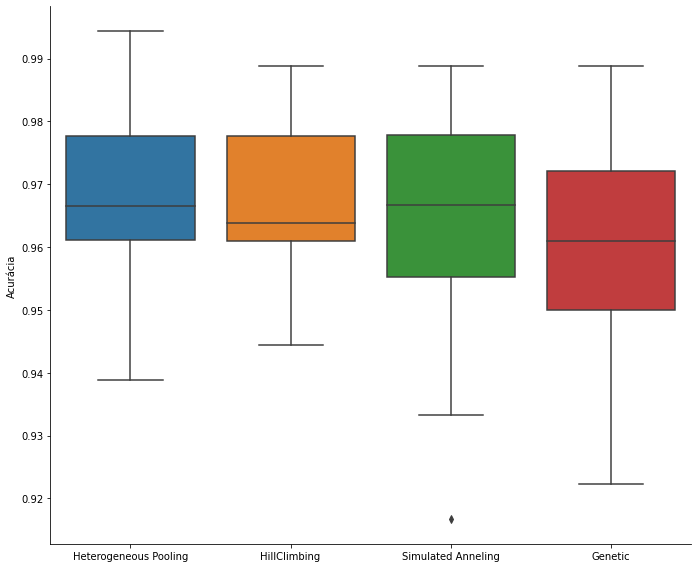

In [24]:
import seaborn as sns
import pandas as pd

scores = pd.DataFrame(data={'Heterogeneous Pooling': heterogeneousPooling.getScores(),
                            'HillClimbing': hc.getScores(),
                            'Simulated Annealing': sa.getScores(),
                            'Genetic': gn.getScores()})
ax = sns.catplot(data=scores, kind="box", height=8, aspect=1.2)
ax.set(ylabel='Acurácia')

### Testes de hipótese

In [25]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

labels = ['Heterogeneous', 'HillClimbing', 'SimulatedAnnealing', 'Genetic']
models = [heterogeneousPooling.getScores(), hc.getScores(), sa.getScores(), gn.getScores()]
p_table = pd.DataFrame(index=range(4),columns=range(4))

for i in range(4):
    for j in range(4):
        if i == j:
            p_table.loc[i, j] = labels[i]
        elif j > i:
            _, p = ttest_rel(models[i], models[j])
            p_table.loc[i, j] = p
        else:
            _, p = wilcoxon(models[i], models[j])
            p_table.loc[i, j] = p
            
p_table.style.applymap(lambda v: '' if type(v) == str or v >= 0.05 else 'font-weight: bold').hide_index()

0,1,2,3
Heterogeneous,0.694724,0.473621,0.009070
0.837951,HillClimbing,0.333599,0.006534
0.693014,0.353350,SimulatedAnneling,0.155090
0.014988,0.011807,0.174015,Genetic


# Treinamento dos Classificadores utilizando a base de dados Wine

In [1]:
from sklearn import datasets
(wine_data, wine_target) = datasets.load_wine(return_X_y=True) #importando a base de dados

### Heterogeneous Pooling

In [2]:
from HeterogeneousPooling import *
heterogeneousPooling = HeterogeneousPooling()
heterogeneousPooling.fit(X = wine_data, y = wine_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 0.06 minutos


In [3]:
(heterogeneousPooling_mean, heterogeneousPooling_std, heterogeneousPooling_inf, heterogeneousPooling_sup) = heterogeneousPooling.results()

### Heterogeneous Pooling usando Hill Climbing

In [4]:
from HeterogeneousPooling import *
hc = HeterogeneousPooling('hill climbing')
hc.fit(X = wine_data, y = wine_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 4.03 minutos


In [5]:
(hillClimbing_mean, hillClimbing_std, hillClimbing_inf, hillClimbing_sup) = hc.results()

### Heterogeneous Pooling usando Simulated Anneling 

In [6]:
from HeterogeneousPooling import *
sa = HeterogeneousPooling('simulated anneling')
sa.fit(X = wine_data, y = wine_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 3.59 minutos


In [7]:
(simulatedAnneling_mean, simulatedAnneling_std, simulatedAnneling_inf, simulatedAnneling_sup) = sa.results()

### Heterogeneous Pooling usando Genetic Algorithm

In [8]:
from HeterogeneousPooling import *
gn = HeterogeneousPooling('genetic')
gn.fit(X = wine_data, y = wine_target)

Treinando Heterogeneous Pooling...
Finalizado!
Tempo de treinamento 8.59 minutos


In [9]:
(genetic_mean, genetic_std, genetic_inf, genetic_sup) = gn.results()

### Tabela com resultados

In [10]:
import pandas as pd

wine_table = pd.DataFrame(data={'Média':[heterogeneousPooling_mean, hillClimbing_mean, simulatedAnneling_mean, genetic_mean],
                                  'Desvio Padrão':[heterogeneousPooling_std, hillClimbing_std, simulatedAnneling_std, genetic_std],
                                  'Limite Inferior':[heterogeneousPooling_inf, hillClimbing_inf, simulatedAnneling_inf, genetic_inf],
                                  'Limite Superior':[heterogeneousPooling_sup, hillClimbing_sup, simulatedAnneling_sup, genetic_sup]},
                            index=['HeterogeneousPooling', 'HillClimbing', 'SimulatedAnnealing', 'Genetic'])
wine_table

,Média,Desvio Padrão,Limite Inferior,Limite Superior
HeterogeneousPooling,0.979412,0.039443,0.965297,0.993526
HillClimbing,0.977560,0.037057,0.964300,0.990820
SimulatedAnnealing,0.960566,0.059986,0.939101,0.982032
Genetic,0.973965,0.053222,0.954920,0.993010


### Boxplot com resultados

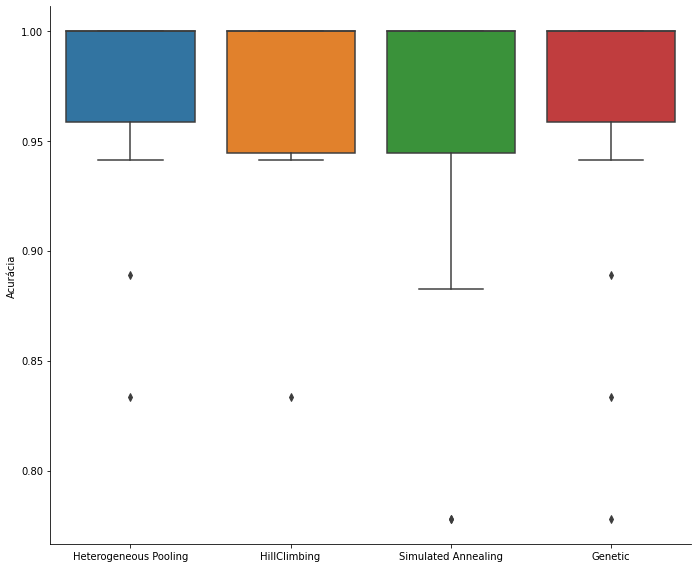

In [14]:
import seaborn as sns
import pandas as pd

scores = pd.DataFrame(data={'Heterogeneous Pooling': heterogeneousPooling.getScores(),
                            'HillClimbing': hc.getScores(),
                            'Simulated Annealing': sa.getScores(),
                            'Genetic': gn.getScores()})
ax = sns.catplot(data=scores, kind="box", height=8, aspect=1.2)
ax.set(ylabel='Acurácia')

### Testes de hipótese

In [13]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

labels = ['Heterogeneous', 'HillClimbing', 'SimulatedAnnealing', 'Genetic']
models = [heterogeneousPooling.getScores(), hc.getScores(), sa.getScores(), gn.getScores()]
p_table = pd.DataFrame(index=range(4),columns=range(4))

for i in range(4):
    for j in range(4):
        if i == j:
            p_table.loc[i, j] = labels[i]
        elif j > i:
            _, p = ttest_rel(models[i], models[j])
            p_table.loc[i, j] = p
        else:
            _, p = wilcoxon(models[i], models[j])
            p_table.loc[i, j] = p
            
p_table.style.applymap(lambda v: '' if type(v) == str or v >= 0.05 else 'font-weight: bold').hide_index()

0,1,2,3
Heterogeneous,0.572515,0.002246,0.386841
0.563703,HillClimbing,0.024949,0.585818
0.006459,0.018256,SimulatedAnnealing,0.067084
0.416366,0.853923,0.080057,Genetic
